<h1>Analysis of Azog C1 chip: chip characterisation</h1>
Online analysis script used to analyse the data collected during the cooldown of the chip.

In [2]:
sample_name = 'azog_c1'                    # name of the chip in the fridge

<h3>Basic imports and database loading</h3>

In [3]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd

# sys.path.append('/home/ncr/Programs/Anaconda/lib/python3.9/site-packages/resonator_tools-0.1-py3.9.egg')
# from resonator_tools import circuit

import qcodes as qc
from qcodes import initialise_database, load_by_run_spec
from qcodes.dataset.plotting import plot_by_id

import scipy.optimize

# import ipywidgets as widgets
# from ipywidgets import interact, interact_manual

In [4]:
# plot options
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size=24)
#plt.rcParams.update({'font.size': 16})

In [5]:
db_name = './zenodo_export_MWoff.db'   # name of the database
db_path  = os.path.join(db_name)

qc.initialise_or_create_database_at(db_path)

<h2>Data analysis and plotting</h2>

<h4>IV of the Bloch array for large and low voltages</h4>

In [6]:
# pm 5V
RUN_ID = 5
dataset = qc.load_by_id(RUN_ID)
iv_curves_0 = dataset.to_pandas_dataframe_dict()

# pm 1V
RUN_ID = 4
dataset = qc.load_by_id(RUN_ID)
iv_curves_1 = dataset.to_pandas_dataframe_dict()

# pm 100mV
RUN_ID = 3
dataset = qc.load_by_id(RUN_ID)
iv_curves_2 = dataset.to_pandas_dataframe_dict()

# pm 10mV
RUN_ID = 2
dataset = qc.load_by_id(RUN_ID)
iv_curves_3 = dataset.to_pandas_dataframe_dict()

# pm 1mV
RUN_ID = 1
dataset = qc.load_by_id(RUN_ID)
iv_curves_4 = dataset.to_pandas_dataframe_dict()

In [7]:
# IV curve 0
iv_curves_up_0 = iv_curves_0['adwin_up_ramp']
iv_curves_up_1 = iv_curves_up_0.reset_index()
v_up = iv_curves_up_1['adwin_input_2_voltage_up'].to_numpy()
i_up = iv_curves_up_1['adwin_up_ramp'].to_numpy()

# down ramp
iv_curves_down_0 = iv_curves_0['adwin_down_ramp']
iv_curves_down_1 = iv_curves_down_0.reset_index()
v_down = iv_curves_down_1['adwin_input_2_voltage_down'].to_numpy()
i_down = iv_curves_down_1['adwin_down_ramp'].to_numpy()

# divide into low-to-high and high-to-low
N = len(v_up)
zero_index_up = np.argmin(np.abs(i_up))
zero_index_down = np.argmin(np.abs(i_down))

i_0_lh = np.concatenate(( np.flip(i_down[zero_index_down:]), i_up[zero_index_up:] ))
i_0_hl = np.concatenate(( i_up[:zero_index_up], np.flip(i_down[:zero_index_down]) ))
v_0_lh = np.linspace(np.min(v_up), np.max(v_up), len(i_0_lh))
v_0_hl = np.linspace(np.min(v_down), np.max(v_down), len(i_0_hl))

# IV curve 1
iv_curves_up_0 = iv_curves_1['adwin_up_ramp']
iv_curves_up_1 = iv_curves_up_0.reset_index()
v_up = iv_curves_up_1['adwin_input_2_voltage_up'].to_numpy()
i_up = iv_curves_up_1['adwin_up_ramp'].to_numpy()

# down ramp
iv_curves_down_0 = iv_curves_1['adwin_down_ramp']
iv_curves_down_1 = iv_curves_down_0.reset_index()
v_down = iv_curves_down_1['adwin_input_2_voltage_down'].to_numpy()
i_down = iv_curves_down_1['adwin_down_ramp'].to_numpy()

# divide into low-to-high and high-to-low
N = len(v_up)
zero_index_up = np.argmin(np.abs(i_up))
zero_index_down = np.argmin(np.abs(i_down))

i_1_lh = np.concatenate(( np.flip(i_down[zero_index_down:]), i_up[zero_index_up:] ))
i_1_hl = np.concatenate(( i_up[:zero_index_up], np.flip(i_down[:zero_index_down]) ))
v_1_lh = np.linspace(np.min(v_up), np.max(v_up), len(i_1_lh))
v_1_hl = np.linspace(np.min(v_down), np.max(v_down), len(i_1_hl))


# IV curve 2
iv_curves_up_0 = iv_curves_2['adwin_up_ramp']
iv_curves_up_1 = iv_curves_up_0.reset_index()
v_up = iv_curves_up_1['adwin_input_2_voltage_up'].to_numpy()
i_up = iv_curves_up_1['adwin_up_ramp'].to_numpy()

# down ramp
iv_curves_down_0 = iv_curves_2['adwin_down_ramp']
iv_curves_down_1 = iv_curves_down_0.reset_index()
v_down = iv_curves_down_1['adwin_input_2_voltage_down'].to_numpy()
i_down = iv_curves_down_1['adwin_down_ramp'].to_numpy()

# divide into low-to-high and high-to-low
N = len(v_up)
M = len(v_down)
zero_index_up = np.argmin(np.abs(i_up))
zero_index_down = np.argmin(np.abs(i_down))

i_2_lh = np.concatenate(( np.flip(i_down[zero_index_down:]), i_up[zero_index_up:] ))
i_2_hl = np.concatenate(( i_up[:zero_index_up], np.flip(i_down[:zero_index_down]) ))
v_2_lh = np.linspace(np.min(v_up), np.max(v_up), len(i_2_lh))
v_2_hl = np.linspace(np.min(v_down), np.max(v_down), len(i_2_hl))


# IV curve 3
iv_curves_up_0 = iv_curves_3['adwin_up_ramp']
iv_curves_up_1 = iv_curves_up_0.reset_index()
v_up = iv_curves_up_1['adwin_input_2_voltage_up'].to_numpy()
i_up = iv_curves_up_1['adwin_up_ramp'].to_numpy()

# down ramp
iv_curves_down_0 = iv_curves_3['adwin_down_ramp']
iv_curves_down_1 = iv_curves_down_0.reset_index()
v_down = iv_curves_down_1['adwin_input_2_voltage_down'].to_numpy()
i_down = iv_curves_down_1['adwin_down_ramp'].to_numpy()

# divide into low-to-high and high-to-low
N = len(v_up)
M = len(v_down)
zero_index_up = np.argmin(np.abs(i_up))
zero_index_down = np.argmin(np.abs(i_down))

i_3_lh = np.concatenate(( np.flip(i_down[zero_index_down:]), i_up[zero_index_up:] ))
i_3_hl = np.concatenate(( i_up[:zero_index_up], np.flip(i_down[:zero_index_down]) ))
v_3_lh = np.linspace(np.min(v_up), np.max(v_up), len(i_3_lh))
v_3_hl = np.linspace(np.min(v_down), np.max(v_down), len(i_3_hl))


# IV curve 4
iv_curves_up_0 = iv_curves_4['adwin_up_ramp']
iv_curves_up_1 = iv_curves_up_0.reset_index()
v_up = iv_curves_up_1['adwin_input_2_voltage_up'].to_numpy()
i_up = iv_curves_up_1['adwin_up_ramp'].to_numpy()

# down ramp
iv_curves_down_0 = iv_curves_4['adwin_down_ramp']
iv_curves_down_1 = iv_curves_down_0.reset_index()
v_down = iv_curves_down_1['adwin_input_2_voltage_down'].to_numpy()
i_down = iv_curves_down_1['adwin_down_ramp'].to_numpy()

# divide into low-to-high and high-to-low
N = len(v_up)
M = len(v_down)
zero_index_up = np.argmin(np.abs(i_up))
zero_index_down = np.argmin(np.abs(i_down))

i_4_lh = np.concatenate(( np.flip(i_down[zero_index_down:]), i_up[zero_index_up:] ))
i_4_hl = np.concatenate(( i_up[:zero_index_up], np.flip(i_down[:zero_index_down]) ))
v_4_lh = np.linspace(np.min(v_up), np.max(v_up), len(i_4_lh))
v_4_hl = np.linspace(np.min(v_down), np.max(v_down), len(i_4_hl))

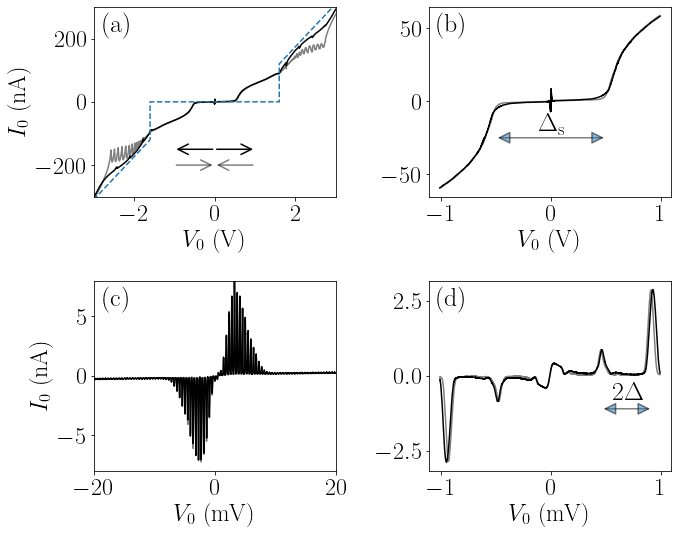

In [8]:
voltage_scale = 1e3
current_scale = 1e9
circuit_resistance = 30e3
fig, ax = plt.subplots(2,2,figsize=(10,8))
plt.rc('font', family = 'serif', size=26)

ax[0,0].plot(v_0_lh, current_scale*i_0_lh, 'black')
ax[0,0].plot(v_0_hl, current_scale*i_0_hl, 'black', alpha=0.5)
ax[0,0].plot(v_2_lh - circuit_resistance*i_2_lh, current_scale*i_2_lh, 'black')
ax[0,0].plot([-3., -1.6, -1.6, 1.6, 1.6, 3.], [-310, -120, 0, 0, 120, 310], '--')
ax[0,0].set_xlim([-3,3])
ax[0,0].set_ylim([-300,300])

ax[0,0].set_ylabel('$I_0$ (nA)')
ax[0,0].set_xlabel('$V_0$ (V)')
ax[0,0].text(0.1, 0.9, '(a)', horizontalalignment='center', verticalalignment='center', transform=ax[0,0].transAxes)
# arrows
ax[0,0].annotate("", xy=(0, -200), xytext=(1, -200), arrowprops=dict(arrowstyle="->", linewidth=1.5, alpha=0.5))
ax[0,0].annotate("", xy=(0, -200), xytext=(-1, -200), arrowprops=dict(arrowstyle="->", linewidth=1.5, alpha=0.5))
ax[0,0].annotate("", xy=(0, -150), xytext=(1, -150), arrowprops=dict(arrowstyle="<-", linewidth=1.5))
ax[0,0].annotate("", xy=(0, -150), xytext=(-1, -150), arrowprops=dict(arrowstyle="<-", linewidth=1.5))


ax[0,1].plot(v_1_lh - circuit_resistance*i_1_lh, current_scale*i_1_lh, 'black')
ax[0,1].plot(v_2_lh - circuit_resistance*i_2_lh, current_scale*i_2_lh, 'black')
ax[0,1].plot(v_1_hl - circuit_resistance*i_1_hl, current_scale*i_1_hl, 'black', alpha=0.5)
ax[0,1].set_xlabel('$V_0$ (V)')
ax[0,1].text(0.1, 0.9, '(b)', horizontalalignment='center', verticalalignment='center', transform=ax[0,1].transAxes)
ax[0,1].annotate("", xy=(-0.5, -25), xytext=(0.5, -25), arrowprops=dict(arrowstyle="<|-|>", linewidth=1.5, alpha=0.5))
ax[0,1].text(0, -20, '$\Delta_\mathrm{s}$', horizontalalignment='center')

ax[1,0].plot(voltage_scale*v_2_lh, current_scale*i_2_lh, 'black')
ax[1,0].plot(voltage_scale*v_2_hl, current_scale*i_2_hl, 'black', alpha=0.5)
ax[1,0].set_xlim([-20, 20])
ax[1,0].set_ylim([-8,8])
ax[1,0].set_xlabel('$V_0$ (mV)')
ax[1,0].set_ylabel('$I_0$ (nA)')
ax[1,0].text(0.1, 0.9, '(c)', horizontalalignment='center', verticalalignment='center', transform=ax[1,0].transAxes)


#ax[2].plot(voltage_scale*v_3_lh, current_scale*i_3_lh, 'black')
#ax[2].plot(voltage_scale*v_3_hl, current_scale*i_3_hl, 'black', alpha=0.5)
#ax[2].set_xlim([-5, 5])
#ax[2].set_ylim([-10,10])
#ax[2].set_xlabel('$V_0$ (mV)')
#ax[2].text(0.1, 0.9, '(c)', horizontalalignment='center', verticalalignment='center', transform=ax[2].transAxes)


ax[1,1].plot(voltage_scale*v_4_lh, current_scale*i_4_lh, 'black')
ax[1,1].plot(voltage_scale*v_4_hl, current_scale*i_4_hl, 'black', alpha=0.5)
ax[1,1].set_xlabel('$V_0$ (mV)')
ax[1,1].text(0.1, 0.9, '(d)', horizontalalignment='center', verticalalignment='center', transform=ax[1,1].transAxes)
ax[1,1].annotate("", xy=(0.46, -1.1), xytext=(0.92, -1.1), arrowprops=dict(arrowstyle="<|-|>", linewidth=1.5, alpha=0.5))
ax[1,1].text(0.71, -0.8, '$2\Delta$', horizontalalignment='center')

fig.tight_layout()
#plt.savefig('iv_all_m.pdf', bbox_inches='tight')

(-1.0, 1.0)

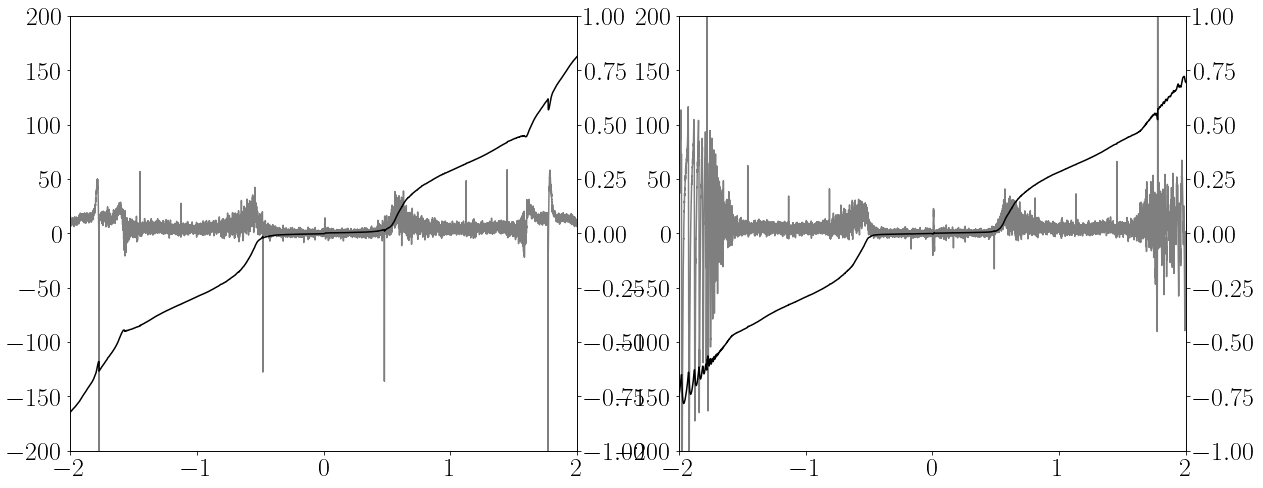

In [9]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

ax[0].plot(v_0_lh, current_scale*i_0_lh, 'black')
ax[0].set_ylim([-200,200])
ax2 = ax[0].twinx()
ax2.plot(v_0_lh, np.gradient(current_scale*i_0_lh), 'black', alpha=0.5)
ax2.set_xlim([-2,2])
ax2.set_ylim([-1,1])

ax[1].plot(v_0_hl, current_scale*i_0_hl, 'black')
ax[1].set_ylim([-200,200])
ax2 = ax[1].twinx()
ax2.plot(v_0_hl, np.gradient(current_scale*i_0_hl), 'black', alpha=0.5)
ax2.set_xlim([-2,2])
ax2.set_ylim([-1,1])

In [10]:
number_of_junctions = 3500
resistance_scale = 1e-3

normal_resistance = (v_0_lh[-1] - v_0_lh[0]) / (i_0_lh[-1] - i_0_lh[0])
print('Calculated normal state resistance: ', resistance_scale*normal_resistance/number_of_junctions, 'kOhm.')

Calculated normal state resistance:  2.2158708831342144 kOhm.


<h4>IV of the Bloch array as a function of the applied flux</h4>

In [11]:
# loading
RUN_ID = 6
dataset = qc.load_by_id(RUN_ID)
ivf_dict = dataset.to_pandas_dataframe_dict()

<h5>Data shaping</h5>

In [12]:
# up ramp
ivf_up_0 = ivf_dict['adwin_up_ramp']
ivf_up_1 = ivf_up_0.reset_index()

Ib_up = ivf_up_1['current_source_current'].to_numpy()
v_up = ivf_up_1['adwin_input_2_voltage_up'].to_numpy()
i_up = ivf_up_1['adwin_up_ramp'].to_numpy()

# down ramp
ivf_down_0 = ivf_dict['adwin_down_ramp']
ivf_down_1 = ivf_down_0.reset_index()

Ib_down = ivf_down_1['current_source_current'].to_numpy()
v_down = ivf_down_1['adwin_input_2_voltage_down'].to_numpy()
i_down = ivf_down_1['adwin_down_ramp'].to_numpy()

# reshape to form a 2D array
N = 20000 # hardcoded for now
size = (-1, N)

Ib_up = np.reshape(Ib_up, size)
v_up = np.reshape(v_up, size)
i_up = np.reshape(i_up, size)
Ib_down = np.reshape(Ib_down, size)
v_down = np.reshape(v_down, size)
i_down = np.reshape(i_down, size)

# divide into low-to-high and high-to-low
M = len(i_up)
zero_index_up = np.argmin(np.abs(i_up[51]))
zero_index_down = np.argmin(np.abs(i_down[51]))

v_lh = np.zeros((M, 2*N - zero_index_down - zero_index_up))
v_hl = np.zeros((M, zero_index_down + zero_index_up))
i_lh = np.zeros((M, 2*N - zero_index_down - zero_index_up))
i_hl = np.zeros((M, zero_index_down + zero_index_up))

for i in range(M):
    v_lh[i] = np.concatenate(( np.flip(v_down[i][zero_index_down:]), v_up[i][zero_index_up:] ))
    v_hl[i] = np.concatenate(( v_up[i][:zero_index_up], np.flip(v_down[i][:zero_index_down]) ))
    i_lh[i] = np.concatenate(( np.flip(i_down[i][zero_index_down:]), i_up[i][zero_index_up:] ))
    i_hl[i] = np.concatenate(( i_up[i][:zero_index_up], np.flip(i_down[i][:zero_index_down]) ))

<h5>Plotting</h5>

Text(-6.25, 2, '(e)')

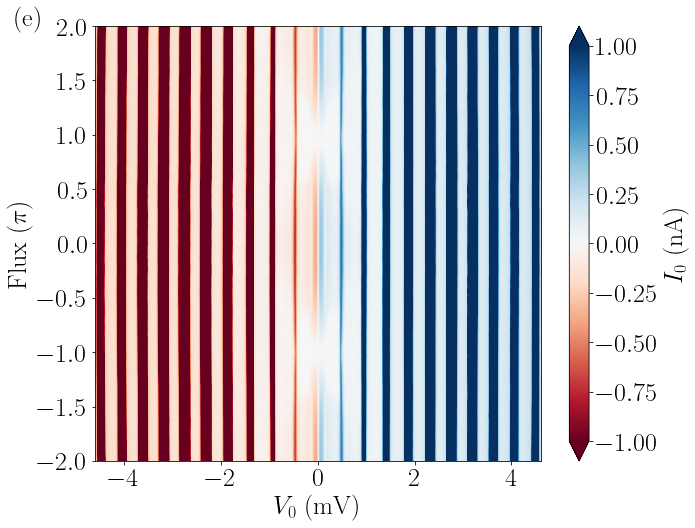

In [13]:
# plotting
plt.figure(figsize=(10,8))

voltage_scaling = 1e3
voltage_offset = 0.45e-3
current_scaling = 1e9
vstart_index = 4955
vend_index = 14000

plt.imshow(current_scaling*i_lh[:,vstart_index:vend_index], aspect='auto', 
           extent=[voltage_scaling*(v_lh[0,vstart_index] + voltage_offset), voltage_scaling*(v_lh[0,vend_index] + voltage_offset), -2, 2], 
           vmin = -1, vmax=1, cmap='RdBu')
plt.xlabel('$V_0$ (mV)')
plt.ylabel('Flux ($\pi$)')
plt.colorbar(label='$I_0$ (nA)', extend='both')
plt.text(-6.25, 2, '(e)')

#plt.hlines(-1, -5, 5, linestyles='dashed', colors='black', alpha=0.5)
#plt.hlines(0, -5, 5, linestyles='dashed', colors='black', alpha=0.5)

#plt.savefig('iv_flux_m.pdf', bbox_inches='tight')

C:\Users\NICOLA~1.ROC\AppData\Local\Temp/ipykernel_17216/4217964075.py:12: RuntimeWarning: divide by zero encountered in log
  p0 = ax[0,0].imshow(np.log( np.abs( current_scaling*i_lh[:,vstart_index:vend_index] ) ), aspect='auto',
C:\Users\NICOLA~1.ROC\AppData\Local\Temp/ipykernel_17216/4217964075.py:38: RuntimeWarning: divide by zero encountered in log
  p2 = ax[1,0].imshow(np.log( np.abs( current_scaling*i_lh[:,vstart_index:vend_index] ) ), aspect='auto',


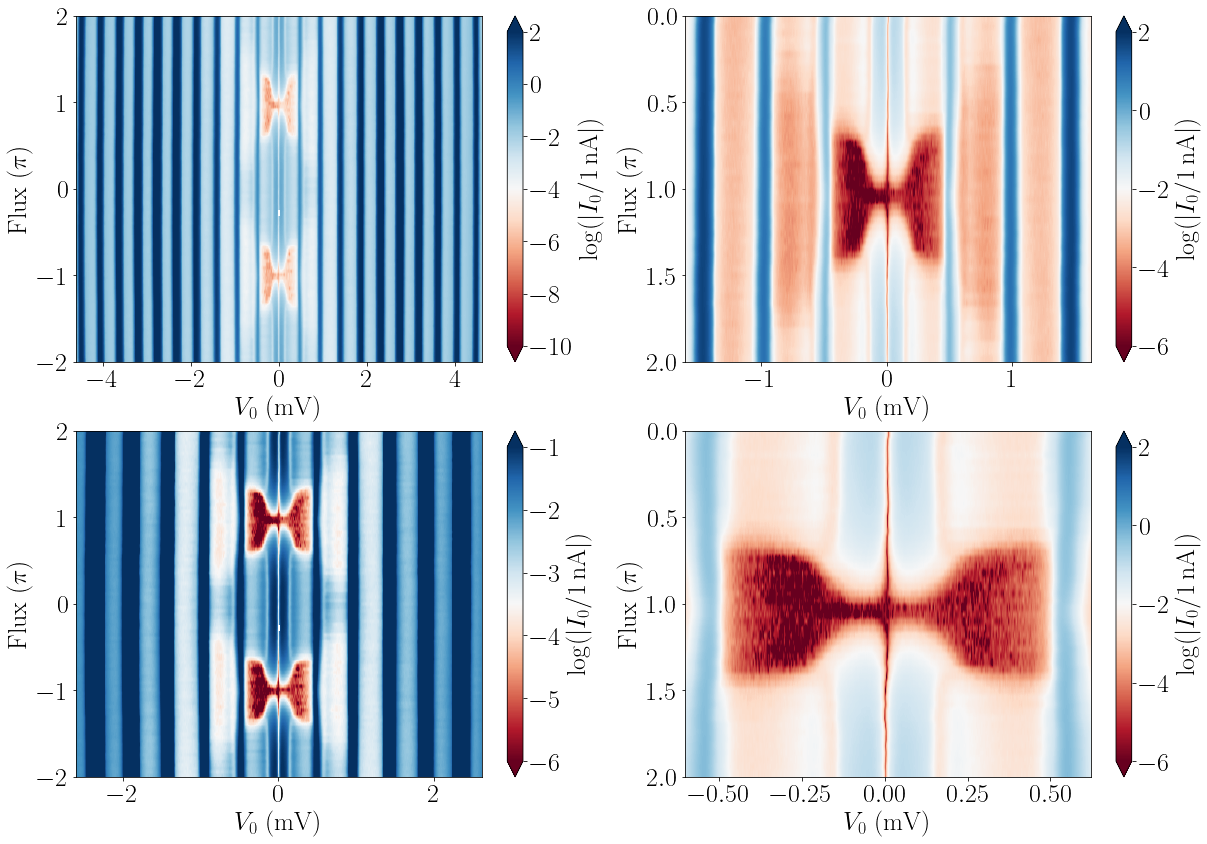

In [14]:
# plotting
fig, ax = plt.subplots(2, 2, figsize=(20,14))

voltage_scaling = 1e3
voltage_offset = 0.45e-3
current_scaling = 1e9

# full
vstart_index = 4955
vend_index = 14000

p0 = ax[0,0].imshow(np.log( np.abs( current_scaling*i_lh[:,vstart_index:vend_index] ) ), aspect='auto', 
           extent=[voltage_scaling*(v_lh[0,vstart_index] + voltage_offset), voltage_scaling*(v_lh[0,vend_index] + voltage_offset), -2, 2], 
           vmin = -10, vmax=2, cmap='RdBu')
ax[0,0].set_xlabel('$V_0$ (mV)')
ax[0,0].set_ylabel('Flux ($\pi$)')
#ax[0,0].text(-6.25, 2, '(a)')
fig.colorbar(p0, label='$\log(|I_0/\mathrm{1\,nA}|)$', extend='both', ax=ax[0,0])

# center
vstart_index = 7955
vend_index = 11000
ystart = 0
yend = 50

p1 = ax[0,1].imshow(np.log( np.abs( current_scaling*i_lh[ystart:yend,vstart_index:vend_index] ) ), aspect='auto', 
           extent=[voltage_scaling*(v_lh[0,vstart_index] + voltage_offset), voltage_scaling*(v_lh[0,vend_index] + voltage_offset), 2, 0], 
           vmin = -6, vmax=2, cmap='RdBu')
ax[0,1].set_xlabel('$V_0$ (mV)')
ax[0,1].set_ylabel('Flux ($\pi$)')
#ax[0,1].text(-6.25, 2, '(b)')
fig.colorbar(p1, label='$\log(|I_0/\mathrm{1\,nA}|)$', extend='both', ax=ax[0,1])

# full rescaled
vstart_index = 6955
vend_index = 12000

p2 = ax[1,0].imshow(np.log( np.abs( current_scaling*i_lh[:,vstart_index:vend_index] ) ), aspect='auto', 
           extent=[voltage_scaling*(v_lh[0,vstart_index] + voltage_offset), voltage_scaling*(v_lh[0,vend_index] + voltage_offset), -2, 2], 
           vmin = -6, vmax=-1, cmap='RdBu')
ax[1,0].set_xlabel('$V_0$ (mV)')
ax[1,0].set_ylabel('Flux ($\pi$)')
#ax[1,0].text(-6.25, 2, '(c)')
fig.colorbar(p2, label='$\log(|I_0/\mathrm{1\,nA}|)$', extend='both', ax=ax[1,0])

# centerissimo
vstart_index = 8955
vend_index = 10000
ystart = 0
yend = 50

p3 = ax[1,1].imshow(np.log( np.abs( current_scaling*i_lh[ystart:yend,vstart_index:vend_index] ) ), aspect='auto', 
           extent=[voltage_scaling*(v_lh[0,vstart_index] + voltage_offset), voltage_scaling*(v_lh[0,vend_index] + voltage_offset), 2, 0], 
           vmin = -6, vmax=2, cmap='RdBu')
ax[1,1].set_xlabel('$V_0$ (mV)')
ax[1,1].set_ylabel('Flux ($\pi$)')
#ax[1,1].text(-6.25, 2, '(d)')
fig.colorbar(p3, label='$\log(|I_0/\mathrm{1\,nA}|)$', extend='both', ax=ax[1,1])


#plt.hlines(-1, -5, 5, linestyles='dashed', colors='black', alpha=0.5)
#plt.hlines(0, -5, 5, linestyles='dashed', colors='black', alpha=0.5)

#plt.savefig('iv_flux_m.pdf', bbox_inches='tight')

<h4>IV of the Bloch array as a function of the applied flux with large span</h4>

In [21]:
# loading
RUN_ID = 7
dataset = qc.load_by_id(run_id=7)
ivfl_dict = dataset.to_pandas_dataframe_dict()

<h5>Data shaping</h5>

In [22]:
# up ramp
ivf_up_0 = ivfl_dict['adwin_up_ramp']
ivf_up_1 = ivf_up_0.reset_index()

Ib_up = ivf_up_1['current_source_current'].to_numpy()
v_up = ivf_up_1['adwin_input_2_voltage_up'].to_numpy()
i_up = ivf_up_1['adwin_up_ramp'].to_numpy()

# down ramp
ivf_down_0 = ivfl_dict['adwin_down_ramp']
ivf_down_1 = ivf_down_0.reset_index()

Ib_down = ivf_down_1['current_source_current'].to_numpy()
v_down = ivf_down_1['adwin_input_2_voltage_down'].to_numpy()
i_down = ivf_down_1['adwin_down_ramp'].to_numpy()

# reshape to form a 2D array
N = 25234 # hardcoded for now
size = (-1, N)

Ib_up = np.reshape(Ib_up, size)
v_up = np.reshape(v_up, size)
i_up = np.reshape(i_up, size)
Ib_down = np.reshape(Ib_down, size)
v_down = np.reshape(v_down, size)
i_down = np.reshape(i_down, size)

# divide into low-to-high and high-to-low
M = len(i_up)
zero_index_up = np.argmin(np.abs(i_up[51]))
zero_index_down = np.argmin(np.abs(i_down[51]))

vfl_lh = np.zeros((M, 2*N - zero_index_down - zero_index_up))
vfl_hl = np.zeros((M, zero_index_down + zero_index_up))
ifl_lh = np.zeros((M, 2*N - zero_index_down - zero_index_up))
ifl_hl = np.zeros((M, zero_index_down + zero_index_up))

for i in range(M):
    vfl_lh[i] = np.concatenate(( np.flip(v_down[i][zero_index_down:]), v_up[i][zero_index_up:] ))
    vfl_hl[i] = np.concatenate(( v_up[i][:zero_index_up], np.flip(v_down[i][:zero_index_down]) ))
    ifl_lh[i] = np.concatenate(( np.flip(i_down[i][zero_index_down:]), i_up[i][zero_index_up:] ))
    ifl_hl[i] = np.concatenate(( i_up[i][:zero_index_up], np.flip(i_down[i][:zero_index_down]) ))

<h5>Plotting</h5>

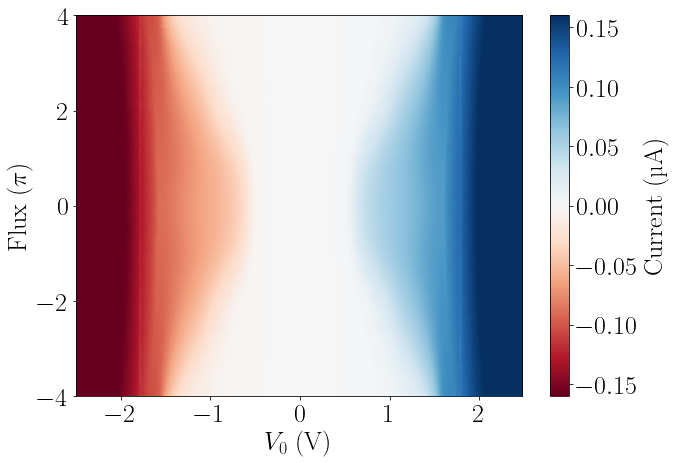

In [23]:
# plotting

plt.figure(figsize=(10,7))
voltage_scaling = 1
voltage_offset = 0
current_scaling = 1e6
min_v_index = int( 25234/4 )
max_v_index = int( 3*25234/4 )

plt.imshow(current_scaling*ifl_lh[:,min_v_index:max_v_index], aspect='auto', 
           extent=[voltage_scaling*vfl_lh[0,min_v_index], voltage_scaling*vfl_lh[0,max_v_index], -4, 4], 
           cmap='RdBu', vmax=0.16, vmin=-0.16)
plt.xlabel('$V_0$ (V)')
plt.ylabel('Flux ($\pi$)')
plt.colorbar(label='Current (µA)')
#plt.text(-3.25, 2, '(g)')

#plt.hlines(-1, -5, 5, linestyles='dashed', colors='black', alpha=0.5)
#plt.hlines(0, -5, 5, linestyles='dashed', colors='black', alpha=0.5)

#plt.savefig('iv_large_flux.pdf', bbox_inches='tight')

1000000.0

<h4>IV of the Bloch array at low voltages and as a function of flux</h4>

In [6]:
# loading IV
RUN_ID = 8
dataset = qc.load_by_id(RUN_ID)
iv_dict = dataset.to_pandas_dataframe_dict()

<h5>Data shaping</h5>

In [7]:
# IV
# up ramp
iv_up_0 = iv_dict['adwin_up_ramp']
iv_up_1 = iv_up_0.reset_index()
v_iv_up = iv_up_1['adwin_input_2_voltage_up'].to_numpy()
i_iv_up = iv_up_1['adwin_up_ramp'].to_numpy()

# down ramp
iv_down_0 = iv_dict['adwin_down_ramp']
iv_down_1 = iv_down_0.reset_index()
v_iv_down = iv_down_1['adwin_input_2_voltage_down'].to_numpy()
i_iv_down = iv_down_1['adwin_down_ramp'].to_numpy()

# divide into low-to-high and high-to-low
N = len(v_iv_up)
M = len(v_iv_down)
zero_index_up = np.argmin(np.abs(i_iv_up[2500:3000])) + 2500
zero_index_down = np.argmin(np.abs(i_iv_down[2500:3000])) + 2500

i_iv_lh = np.concatenate(( np.flip(i_iv_down[zero_index_down:]), i_iv_up[zero_index_up:] ))
i_iv_hl = np.concatenate(( i_iv_up[:zero_index_up], np.flip(i_iv_down[:zero_index_down]) ))
v_iv_lh = np.linspace(np.min(v_iv_up), np.max(v_iv_up), len(i_iv_lh))
v_iv_hl = np.linspace(np.min(v_iv_down), np.max(v_iv_down), len(i_iv_hl))

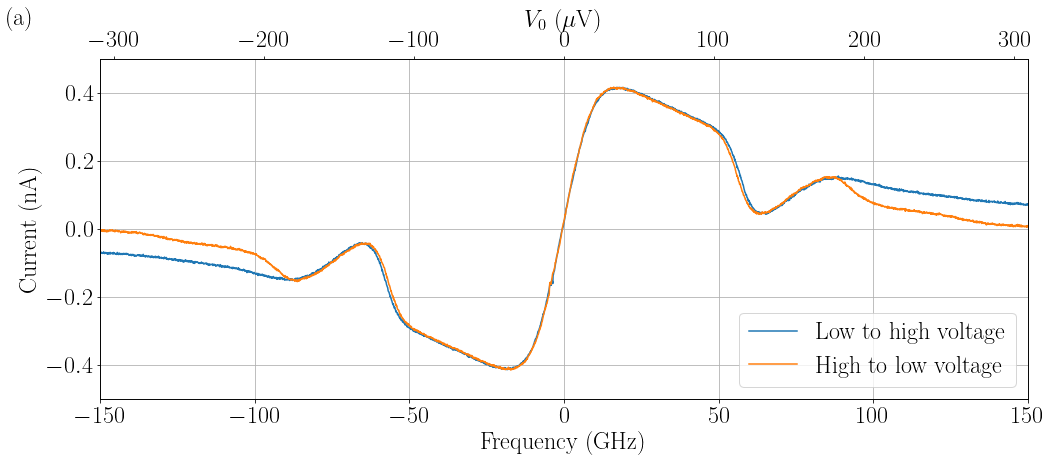

In [14]:
fig, ax = plt.subplots(1,1, figsize=(15,7))

voltage_scale = 1e6
current_scale = 1e9
frequency_scale = 1e-9
hbar = 1.05e-34
e = 1.60e-19
HztoV = 2*np.pi*hbar/2/e
xmin = -150
xmax = 150

ax.plot(frequency_scale*v_iv_lh/HztoV, current_scale*i_iv_lh, label='Low to high voltage')
ax.plot(frequency_scale*v_iv_hl/HztoV, current_scale*i_iv_hl, label='High to low voltage')
ax.set_xlim([xmin,xmax])
ax.set_ylim([-0.5,0.5])

ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Current (nA)')
ax.text(-180, 0.6, '(a)')
ax.legend(loc='lower right')

ax2 = ax.twiny()
ax2.set_xlim([HztoV*xmin/frequency_scale*voltage_scale, HztoV*xmax/frequency_scale*voltage_scale])
ax2.set_xlabel('$V_0$ ($\mathrm{\mu V}$)')
ax.grid()
fig.tight_layout()

#plt.savefig('zerocurrent_a.pdf', bbox_inches='tight')

Text(0, 0.5, 'Current (A)')

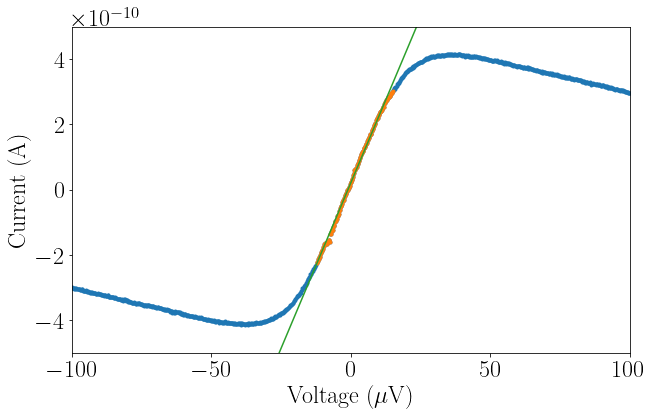

In [21]:
plt.figure(figsize=(10,6))

start = 2700
stop = 2850

v_fit = v_iv_lh[start:stop]
i_fit = i_iv_lh[start:stop]

coef = np.polyfit(v_fit, i_fit ,1)
poly1d_fit = np.poly1d(coef) 

plt.plot(v_iv_lh*voltage_scale, i_iv_lh, '.')
plt.plot(v_fit*voltage_scale, i_fit, '.')
plt.plot(v_iv_lh*voltage_scale, poly1d_fit(v_iv_lh))

plt.xlim([-100, 100])
plt.ylim([-5e-10, 5e-10])

plt.xlabel('Voltage ($\mathrm{\mu V}$)')
plt.ylabel('Current (A)')

# there is a conductance peak!

In [22]:
# loading IV vs flux
RUN_ID = 9
dataset = qc.load_by_id(RUN_ID)
ivflux_dict = dataset.to_pandas_dataframe_dict()

In [23]:
# up ramp
ivf_up_0 = ivflux_dict['adwin_up_ramp']
ivf_up_1 = ivf_up_0.reset_index()

Ib_up = ivf_up_1['current_source_current'].to_numpy()
v_up = ivf_up_1['adwin_input_2_voltage_up'].to_numpy()
i_up = ivf_up_1['adwin_up_ramp'].to_numpy()

# down ramp
ivf_down_0 = ivflux_dict['adwin_down_ramp']
ivf_down_1 = ivf_down_0.reset_index()

Ib_down = ivf_down_1['current_source_current'].to_numpy()
v_down = ivf_down_1['adwin_input_2_voltage_down'].to_numpy()
i_down = ivf_down_1['adwin_down_ramp'].to_numpy()

# reshape to form a 2D array
N = 999 # hardcoded for now
size = (-1, N)

Ib_up = np.reshape(Ib_up, size)
v_up = np.reshape(v_up, size)
i_up = np.reshape(i_up, size)
Ib_down = np.reshape(Ib_down, size)
v_down = np.reshape(v_down, size)
i_down = np.reshape(i_down, size)

# divide into low-to-high and high-to-low
M = len(i_up)
zero_index_up = np.argmin(np.abs(i_up[51]))
zero_index_down = np.argmin(np.abs(i_down[51]))

vflux_lh = np.zeros((M, 2*N - zero_index_down - zero_index_up))
vflux_hl = np.zeros((M, zero_index_down + zero_index_up))
iflux_lh = np.zeros((M, 2*N - zero_index_down - zero_index_up))
iflux_hl = np.zeros((M, zero_index_down + zero_index_up))

for i in range(M):
    vflux_lh[i] = np.concatenate(( np.flip(v_down[i][zero_index_down:]), v_up[i][zero_index_up:] ))
    vflux_hl[i] = np.concatenate(( v_up[i][:zero_index_up], np.flip(v_down[i][:zero_index_down]) ))
    iflux_lh[i] = np.concatenate(( np.flip(i_down[i][zero_index_down:]), i_up[i][zero_index_up:] ))
    iflux_hl[i] = np.concatenate(( i_up[i][:zero_index_up], np.flip(i_down[i][:zero_index_down]) ))

C:\Users\NICOLA~1.ROC\AppData\Local\Temp/ipykernel_17216/946291017.py:17: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar_flux = fig.colorbar(fplot, ax=ax[0:], label='$I_0$ (nA)', cmap='RdBu', shrink=0.8, extend='both')


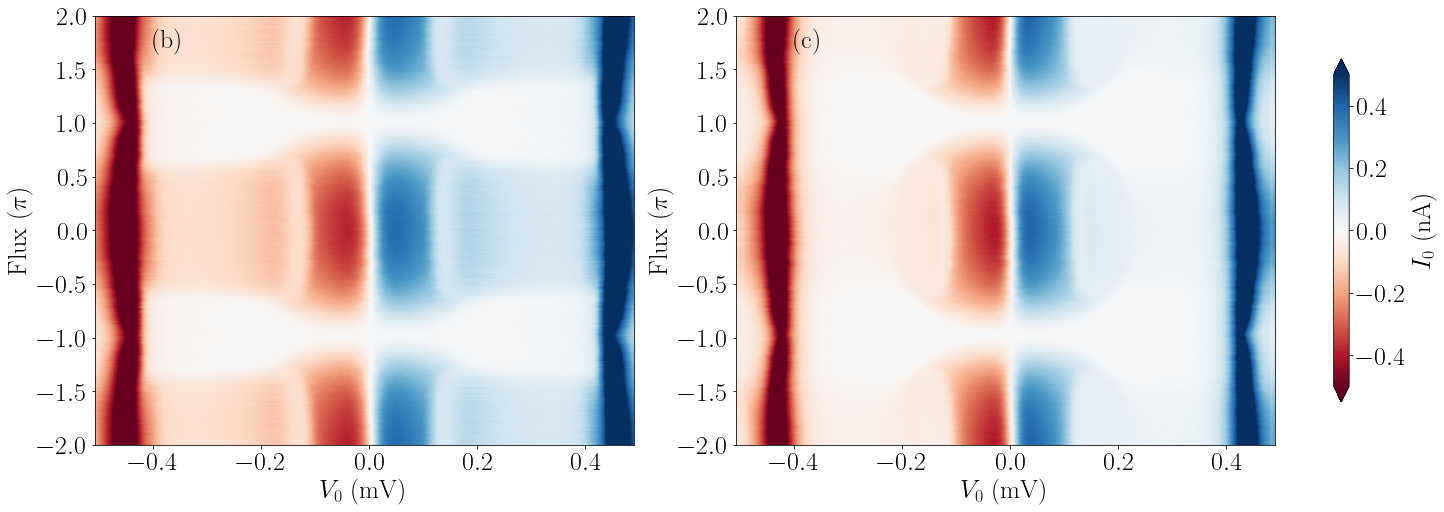

In [24]:
fig, ax = plt.subplots(1,2,figsize=(20,7), constrained_layout=True)
voltage_scale = 1e3
current_scale = 1e9

fplot = ax[0].imshow(iflux_lh[::-1]*current_scale, aspect='auto', vmin=-0.5, vmax=0.5, cmap='RdBu',
             extent = [ voltage_scale*np.min(vflux_lh[0]), voltage_scale*np.max(vflux_lh[0]), -2, 2 ] )
ax[0].set_xlabel('$V_0$ (mV)')
ax[0].set_ylabel('Flux ($\pi$)')
ax[0].text(-0.4,1.7, '(b)')

ax[1].imshow(iflux_hl[::-1]*current_scale, aspect='auto', vmin=-0.5, vmax=0.5, cmap='RdBu',
             extent = [ voltage_scale*np.min(vflux_lh[0]), voltage_scale*np.max(vflux_lh[0]), -2, 2 ] )
ax[1].set_xlabel('$V_0$ (mV)')
ax[1].set_ylabel('Flux ($\pi$)')
ax[1].text(-0.4,1.7, '(c)')

cbar_flux = fig.colorbar(fplot, ax=ax[0:], label='$I_0$ (nA)', cmap='RdBu', shrink=0.8, extend='both')
#plt.savefig('zerocurrent_bc.pdf', bbox_inches='tight')

<h2>Data analysis two-tones</h2>

<h4>IV of the Bloch array as a function of the applied flux</h4>

In [22]:
# loading 2tones
qc.initialise_or_create_database_at(db_path)

RUN_ID = 10
dataset = qc.load_by_id(RUN_ID)
twotf_dict = dataset.to_pandas_dataframe_dict()

<h5>Data shaping</h5>

In [23]:
# twotones
twot_vna_0 = twotf_dict['ZNB20_S21_magnitude']
twot_vna_1 = twot_vna_0.reset_index()

frq_tt = twot_vna_1['mw_source_frequency'].to_numpy()
mw_p = twot_vna_1['mw_source_power'].to_numpy()
mag_tt = twot_vna_1['ZNB20_S21_magnitude'].to_numpy()

m_size = (-1, np.unique(frq_tt).size)
frq_tt = np.reshape(frq_tt, m_size)
mw_p = np.reshape(mw_p, m_size)
mag_tt = np.reshape(mag_tt, m_size)

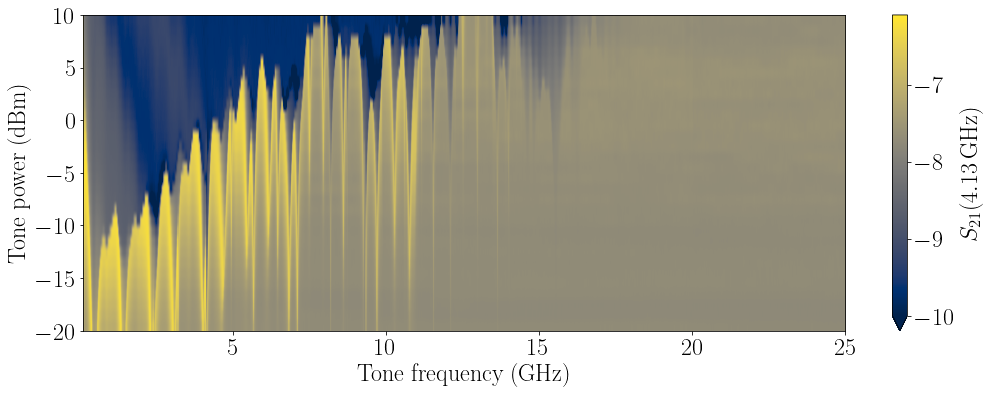

In [24]:
frequency_scale = 1e-9
fmin = np.min(frq_tt)
fmax = np.max(frq_tt)

plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(15,6))

plt.imshow( np.log(mag_tt[::-1]), aspect='auto', cmap='cividis',
            extent = [frequency_scale*fmin, frequency_scale*fmax, np.min(mw_p), np.max(mw_p)], vmin = -10)
plt.colorbar(label='$S_{21}(4.13\,\mathrm{GHz})$', extend='min')
plt.xlabel('Tone frequency (GHz)')
plt.ylabel('Tone power (dBm)')
#plt.text(-2.5, 9.5, '(a)')

#plt.vlines([0.3, 1.25, 2.2, 2.9, 4.0, 4.6], -20, 10, color='white', linestyle='dashed', alpha=0.5)

plt.tight_layout()
#plt.savefig('twotones.pdf', bbox_inches='tight')

<h3>VNA trace as function of the DC bias, with superimposed IV curve</h3>

In [29]:
# loading vna data
RUN_ID = 11
dataset = qc.load_by_id(RUN_ID)
vnadc_vna_dict = dataset.to_pandas_dataframe_dict()

RUN_ID = 2
dataset = qc.load_by_id(RUN_ID)
vnadc_dc_dict = dataset.to_pandas_dataframe_dict()

<h5>Data shaping</h5>

In [30]:
# IV curve
vnadc_dc_up_0 = vnadc_dc_dict['adwin_up_ramp']
vnadc_dc_up_1 = vnadc_dc_up_0.reset_index()
v_up = vnadc_dc_up_1['adwin_input_2_voltage_up'].to_numpy()
i_up = vnadc_dc_up_1['adwin_up_ramp'].to_numpy()

# down ramp
vnadc_dc_down_0 = vnadc_dc_dict['adwin_down_ramp']
vnadc_dc_down_1 = vnadc_dc_down_0.reset_index()
v_down = vnadc_dc_down_1['adwin_input_2_voltage_down'].to_numpy()
i_down = vnadc_dc_down_1['adwin_down_ramp'].to_numpy()

# divide into low-to-high and high-to-low
N = len(v_up)
zero_index_up = np.argmin(np.abs(i_up))
zero_index_down = np.argmin(np.abs(i_down))

v_dc_lh = np.concatenate(( np.flip(v_down[zero_index_down:]), v_up[zero_index_up:] ))
i_dc_lh = np.concatenate(( np.flip(i_down[zero_index_down:]), i_up[zero_index_up:] ))
v_dc_hl = np.concatenate(( v_up[:zero_index_up], np.flip(v_down[:zero_index_down]) ))
i_dc_hl = np.concatenate(( i_up[:zero_index_up], np.flip(i_down[:zero_index_down]) ))

# VNA spectra
vnadc_vna_0 = vnadc_vna_dict['ZNB20_S21_magnitude']
vnadc_vna_1 = vnadc_vna_0.reset_index()

frq = vnadc_vna_1['ZNB20_S21_S21_frequency'].to_numpy()
v_bias = vnadc_vna_1['adwin_output1'].to_numpy()
mag = vnadc_vna_1['ZNB20_S21_magnitude'].to_numpy()

m_size = (-1, np.unique(frq).size)
frq = np.reshape(frq, m_size)
v_bias = np.reshape(v_bias, m_size)
mag = np.reshape(mag, m_size)

<h5>Plotting</h5>

Text(7, 2.004, '')

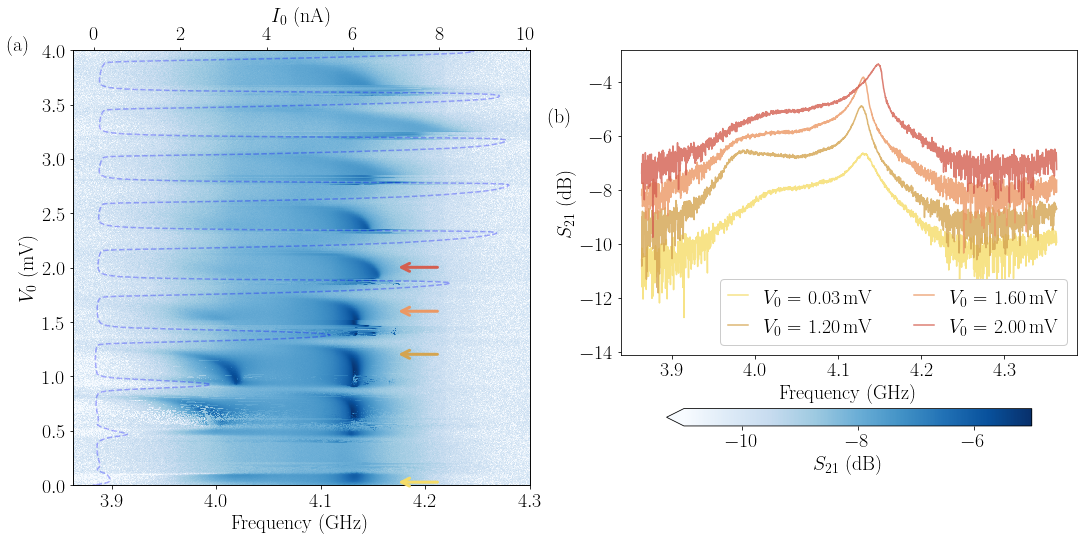

In [31]:
plt.rc('font', family = 'serif', size=20)

fig, ax1 = plt.subplots(1, 2, figsize=(18,8))
voltage_scaling = 1e3
voltage_offset = 0.05
current_scaling = 1e9
frequency_scaling = 1e-9

# first plot
ctf = ax1[0].pcolormesh(frequency_scaling*frq, v_bias, np.log(mag), vmin=-11, shading='nearest', cmap='Blues')
ax1[0].set_ylabel('$V_0$ (mV)')
ax1[0].set_xlabel('Frequency (GHz)')
ax1[0].set_xlim([frequency_scaling*np.min(frq),4.3])
ax1[0].set_ylim([0,4])
ax1[0].text(3.8, 4, '(a)')

ax2 = ax1[0].twiny()
ax2.plot(current_scaling*np.abs(i_up), voltage_scaling*v_up - voltage_offset, 'b--', alpha=0.3)
ax2.set_xlabel('$I_0$ (nA)');

# second plot
frequency_scale = 1e-9
i1 = 2507
i2 = 2801
i3 = 2900
i4 = 3001
i5 = 3101

ax1[1].plot(frequency_scale*frq[i1], np.log(mag[i1]), alpha=0.8, label='$V_0=$ %.2f$\,\mathrm{mV}$' % v_bias[i1,0], c='#F5DC69')
ax1[1].plot(frequency_scale*frq[i2], np.log(mag[i2])+1, alpha=0.8, label='$V_0=$ %.2f$\,\mathrm{mV}$' % v_bias[i2,0], c='#D4A450')
ax1[1].plot(frequency_scale*frq[i3], np.log(mag[i3])+2, alpha=0.8, label='$V_0=$ %.2f$\,\mathrm{mV}$' % v_bias[i3,0], c='#EB9864')
ax1[1].plot(frequency_scale*frq[i4], np.log(mag[i4])+3, alpha=0.8, label='$V_0=$ %.2f$\,\mathrm{mV}$' % v_bias[i4,0], c='#D45F50')
#ax1[1].plot(frequency_scale*frq[i5], np.log(mag[i5]), label='$V_0=$ %.2f$\,\mathrm{mV}$' % v_bias[i5,0])
ax1[1].set_xlabel('Frequency (GHz)')
ax1[1].set_ylabel('$S_{21}$ (dB)')
ax1[1].text(3.75, -5.5, '(b)')
ax1[1].legend(ncol=2, handlelength=1, handleheight=1, framealpha=1)

# plot and relocate the colorbar
cb = fig.colorbar(ctf, ax=ax1[1], label='$S_{21}$ (dB)', extend="min", orientation="horizontal", shrink=0.8)
cax = cb.ax
pos1 = cax.get_position()
yshift = pos1.height - 0.05
pos2 = [pos1.x0, pos1.y0 - yshift, pos1.width, pos1.height]
cax.set_position(pos2)

ax2.annotate('', xy=(8, v_bias[i1,0]), xytext=(7, v_bias[i1,0]), arrowprops=dict(arrowstyle="<-", linewidth=3, color='#F5DC69'))
ax2.annotate('', xy=(8, v_bias[i2,0]), xytext=(7, v_bias[i2,0]), arrowprops=dict(arrowstyle="<-", linewidth=3, color='#D4A450'))
ax2.annotate('', xy=(8, v_bias[i3,0]), xytext=(7, v_bias[i3,0]), arrowprops=dict(arrowstyle="<-", linewidth=3, color='#EB9864'))
ax2.annotate('', xy=(8, v_bias[i4,0]), xytext=(7, v_bias[i4,0]), arrowprops=dict(arrowstyle="<-", linewidth=3, color='#D45F50'))


#fig.tight_layout()
#plt.savefig('s21_dc_b.png', dpi=400, bbox_inches='tight')

<h4>IV curve and microwave mode</h4>

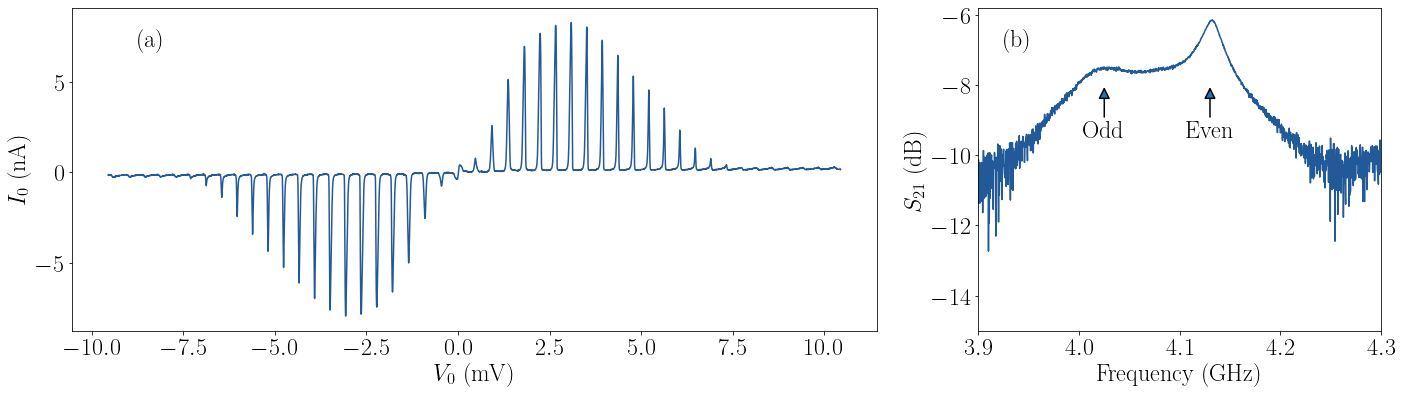

In [33]:
plt.rc('font', family = 'serif', size=24)
fig, ax = plt.subplots(1,2,figsize=(20,6), gridspec_kw={'width_ratios': [2, 1]})
color_even = '#ff910069'
color_odd = '#fc090969'

n1 = 50
n2 = 75
voltage_scaling = 1e3
voltage_offset = 0.45e-3
current_scaling = 1e9
resistance_scaling = 1e3

# better to go for linspace since the biggest error is the adwin readout of the voltage
xv_lh = voltage_scaling*np.linspace(np.min(v_lh[n1]) + voltage_offset, np.max(v_hl[n1]) + voltage_offset, len(i_hl[n1]))

ax[0].plot(xv_lh, current_scaling*i_hl[n1], label='0-flux', c='#225999')
#ax[0].plot(xv_lh, current_scaling*i_hl[n2], '--', label='$\pi$-flux', c='black', alpha=0.6)
ax[0].text(0.1, 0.9, '(a)', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
#ax[0].legend(loc='lower right')
ax[0].set_xlabel('$V_0$ (mV)')
ax[0].set_ylabel('$I_0$ (nA)')

ind = 2515
ax[1].plot(frequency_scaling*frq[ind], np.log(mag[ind]), c='#225999')
ax[1].set_xlim([3.9,4.3])
ax[1].set_ylim([-15,-5.8])
ax[1].text(0.1, 0.9, '(b)', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)
ax[1].annotate("Odd", xy=(4.025, -8), xytext=(4.025, -9.5), arrowprops=dict(arrowstyle="-|>", linewidth=1.5), horizontalalignment='center')
ax[1].annotate("Even", xy=(4.13, -8), xytext=(4.13, -9.5), arrowprops=dict(arrowstyle="-|>", linewidth=1.5), horizontalalignment='center')
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('$S_{21}$ (dB)')

fig.tight_layout()
#plt.savefig('iv_s21.pdf', bbox_inches='tight')